In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Problem 1

A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

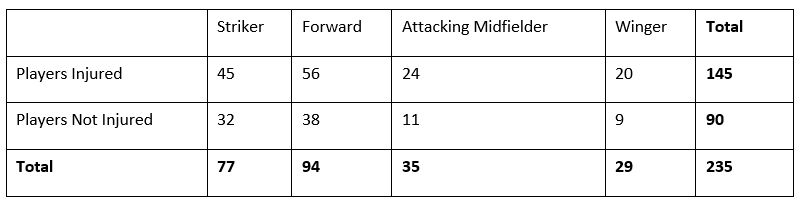

In [2]:
from IPython.display import Image
Image("D:/DataSets/Problem 1_table.png")

### Finding the probability that a randomly chosen player would suffer an injury.

<b> P (Injured) = Total players injured/Total players = 145/235 = 29/47

In [3]:
print(round((145/235),2))

0.62


### The probability that a player is a forward or a winger.

<b> P (Forward OR Winger) = (Total number of forwards + Total number of wingers)/Total players = (94+29)/235 = 123/235  

In [4]:
print(round(((94+29)/235),2))

0.52


### The probability that a randomly chosen player plays in a striker position and has a foot injury

<b> P (Striker AND Injured) = Total number of injured strikers/Total players = 45/235 = 0.19

In [5]:
print(round((45/235),2))

0.19


### The probability that a randomly chosen injured player is a striker.

<b> Probability (Striker|Injured) = Total number of strikers/Total number of injured players = 45/145 = 0.31 </b>

In [6]:
print(round((45/145),2))

0.31


## Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

### Finding the proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm.



In [7]:
#The mean is given as 5 and the std deviations is given as 1.5
mu = 5
sigma = 1.5

#Calculating the cdf value for a breaking strenth of less than 3.17 kg per sq cm
round(norm.cdf(3.17,loc=mu,scale=sigma),2)

0.11

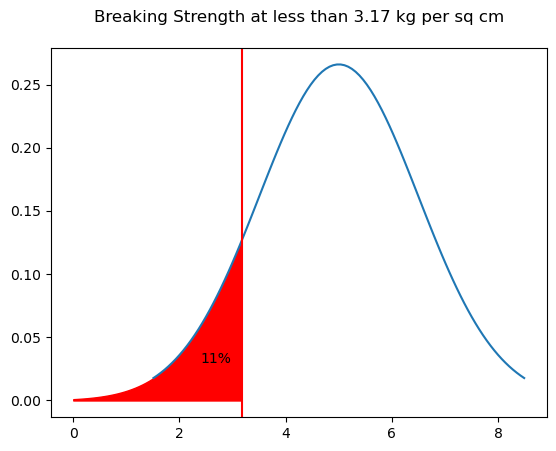

In [8]:
lower = round(norm.ppf(0.01,loc=mu,scale=sigma),2)
upper = round(norm.ppf(0.99,loc=mu,scale=sigma),2)
density = pd.DataFrame()
density["x"] = np.linspace(lower,upper,100)
density["pdf"] = norm.pdf(density["x"], mu, sigma)
plt.plot(density["x"],density["pdf"])
plt.axvline(x = 3.17, c = 'r')
x1 = np.linspace(0,3.17,50) 
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.annotate("11%",(2.4,0.03))
plt.title("Breaking Strength at less than 3.17 kg per sq cm\n")
plt.show()

### Finding the proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.

In [9]:
#Calculating the cdf value for a breaking strenth of at least 3.6 kg per sq cm
1-round(norm.cdf(3.6,loc=mu,scale=sigma),2)

0.8200000000000001

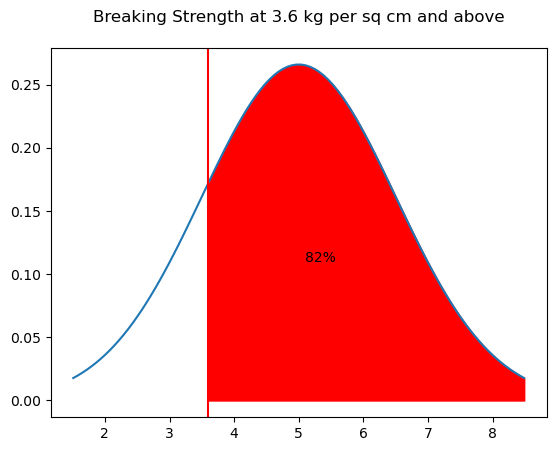

In [10]:
plt.plot(density["x"],density["pdf"])
plt.axvline(x = 3.6, c = 'r')
x1 = np.linspace(3.6,upper,50) 
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.annotate("82%",(5.1,0.11))
plt.title("Breaking Strength at 3.6 kg per sq cm and above\n")
plt.show()

### Finding the proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.

In [11]:
#Calculating the cdf value for a breaking strenth between 5 and 5.5 kg per sq cm
round(norm.cdf(5.5,loc=mu,scale=sigma) - norm.cdf(5,loc=mu,scale=sigma),2)

0.13

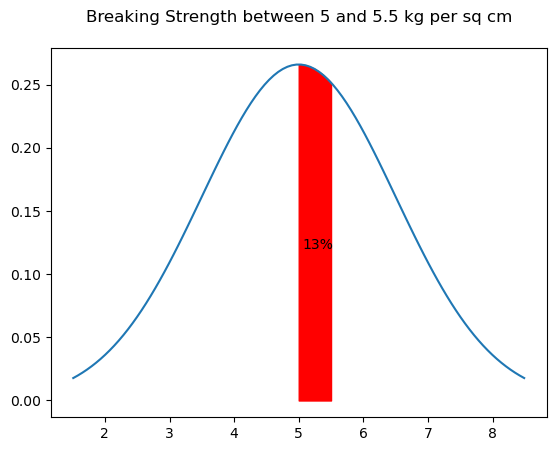

In [12]:
plt.plot(density["x"],density["pdf"])
x1 = np.linspace(5,5.5,50) 
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.title("Breaking Strength between 5 and 5.5 kg per sq cm\n")
plt.annotate("13%",(5.05,0.12))
plt.show()

### Finding the proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.

In [13]:
#Calculating the cdf value for a breaking strenth not lying between 3 and 7.5 kg per sq cm
round(1-(norm.cdf(7.5,loc=mu,scale=sigma) - norm.cdf(3,loc=mu,scale=sigma)),2)

0.14

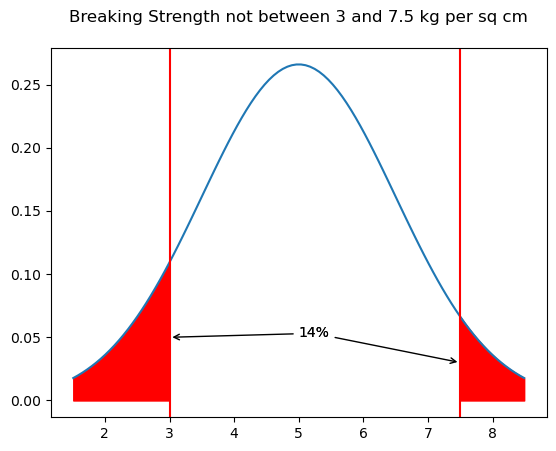

In [14]:
plt.plot(density["x"],density["pdf"])
x1 = np.linspace(lower,3,50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.axvline(x = 7.5, c = 'r')
x2 = np.linspace(7.5,upper,50) 
plt.fill_between(x2, norm.pdf(x2, mu, sigma), color='r')
plt.axvline(x = 3, c = 'r')
arrow_props = dict(facecolor='red', arrowstyle='->')
plt.annotate('14%', xy=(3, 0.05),xytext=(5, 0.05),arrowprops=arrow_props)
plt.annotate('14%', xy=(7.5, 0.03),xytext=(5, 0.05),arrowprops=arrow_props)
plt.title("Breaking Strength not between 3 and 7.5 kg per sq cm\n")
plt.show()

## Problem 3

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

### Zingaro has reason to believe that the unpolished stones may not be suitable for printing. To find whether Zingaro is justified in thinking so or not.

### Choosing the null and alternative hyothesis

The stones should have a Brinell's hardness index of at least 150 for the optimum level of printing hence for the unpolished stones, the folowing null and alternative hypotheses can be established:

$H_0$ -> $\mu_u$ = 150 (Mean of unpolished stones is equal to 150)

$H_a$ -> $\mu_u$ < 150 (Mean of unpolished stones is less than 150)

In [15]:
df = pd.read_csv("D:/DataSets/Zingaro_Company.csv")
df.head(10)

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
5,161.820120,167.086582
6,149.455054,152.699641
7,135.714317,138.648766
8,102.004519,163.384427
9,89.482158,132.141726


In [16]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


### Selecting the significance level

It has been stated that a significance level of 5% can be considered hence:  $\alpha$ = $0.05$

### Selecting the hypothesis test

Since the population standard deviation is not known here, and our alternate hypothesis is if the mean is less than 150, we can conduct a one-tailed t-test for this problem statement. So we use the t distribution and the $t_{STAT}$ test statistic.

### Calculating the p-value and the test statistic

In [17]:
# one sample t-test
t_stat, p_value = ttest_1samp(df.Unpolished,150,alternative='less') # mu expected value = 150
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_stat, p_value))

One sample t test 
t statistic: -4.164629601426757 p value: 4.171286997419652e-05 


### Rejecting or accepting the null hypothesis

It can be seen that the <b>p value is 4.17 * 10<sup>-5</sup></b> which is much smaller than the 5% level of significance. So the statistical decision is to <b> reject the null hypothesis </b> at 5% level of significance in favour of the alternative hypothesis.

### Hence at 95% confidence level, it can be said that the mean Brinell's hardness index for the unpolished stones is less than 150. This indicates Zingaro is justified in thinking that the unpolished stones are not be suitable for printing. </red>

### Finding that if the mean hardness of the polished and unpolished stones the same.

### Choosing the null and alternative hyothesis

The means of the two types of stones need to be compared hence the following null and alternative hypothesis can be established:

$H_0$ -> $\mu_u$ = $\mu_p$ (Mean of unpolished stones is equal to the mean of unpolished stones)

$H_a$ -> $\mu_u$ $\neq$ $\mu_p$ (Mean of unpolished stones is not equal to the mean of unpolished stones)

### Selecting the significance level

It has been stated that a significance level of 5% can be considered hence:  $\alpha$ = $0.05$

### Selecting the hypothesis test

Since the population means of the two types of stones need to be compared and the population standard deviation is unknown, we can conduct a two-tailed unpaired t-test for this problem statement. So we use the t distribution and the $t_{STAT}$ test statistic.

### Calculating the p-value and the test statistic

In [18]:
t_stat, p_value  = ttest_ind(df['Unpolished'],df['Treated and Polished'],alternative='two-sided')
print('tstat',t_stat)    
print('P Value',p_value)

tstat -3.2422320501414053
P Value 0.0014655150194628353


###  Rejecting or accepting the null hypothesis

It can be seen that the <b> p value is 0.0014</b> which is smaller than the 5% level of significance. So the statistical decision is to <b> reject the null hypothesis </b> at 5% level of significance in favour of alternative hypothesis.

### Hence at 95% confidence level, it can be said that the mean hardness for the polished and unpolished stones are not same.

## Problem 4

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

### Finding how does the hardness of implants vary depending on dentists.

In [19]:
df1 = pd.read_excel("D:/DataSets/Dental+Hardness+data.xlsx",sheet_name="Data")
df1.head(10)

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
6,1,2,1,1500,782
7,1,2,1,1600,698
8,1,2,1,1700,665
9,1,2,2,1500,1115


In [20]:
df1.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [21]:
#Converting all the treatments into categorical levels
df1.Dentist = df1.Dentist.astype("object")
df1.Method = df1.Method.astype("object")
df1.Alloy = df1.Alloy.astype("object")
df1.Temp = df1.Temp.astype("object")
df1.Dentist.value_counts()

1    18
2    18
3    18
4    18
5    18
Name: Dentist, dtype: int64

### The hypotheses for the One Way ANOVA are:

For Alloy 1:

$H_0$ -> The mean hardness of implants for alloy 1 is the same across the levels of the treatment dentists.

$H_a$ -> For at least one level of treatment dentists for alloy 1, the mean hardness of implants is different.

For Alloy 2:

$H_0$ -> The mean hardness of implants for alloy 2 is the same across the levels of the treatment dentists.

$H_a$ -> For at least one level of treatment dentists for alloy 2, the mean hardness of implants is different.

Since a single treatment is involved in this problem statement, we will be conducting a way ANOVA test.

### Checking the assumptions of the One Way ANOVA test using the Shapiro's and Levene's test

#### Shapiro's Test

One of the assumptions of one-way ANOVA is that <b> the group populations are normally distributed </b>. This can be validated using the Shapiro-Wilk's test. 

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^S_o$ -> The group populations from which the dental implant sample is provided follow normal distributions for both the alloys for the number of favourable dentists

$H^S_a$ -> The group populations from which the dental implant sample is provided do not follow normal distributions for both the alloys for the number of favourable dentists

In [22]:
#Categorising the response variable as per the different alloys and levels of the number of favourable dentists

#For Alloy 1
a1_dentist_1 = df1[(df1.Dentist == 1) & (df1.Alloy == 1)]["Response"]
a1_dentist_2 = df1[(df1.Dentist == 2) & (df1.Alloy == 1)]["Response"]
a1_dentist_3 = df1[(df1.Dentist == 3) & (df1.Alloy == 1)]["Response"]
a1_dentist_4 = df1[(df1.Dentist == 4) & (df1.Alloy == 1)]["Response"]
a1_dentist_5 = df1[(df1.Dentist == 5) & (df1.Alloy == 1)]["Response"]

#For Alloy 2
a2_dentist_1 = df1[(df1.Dentist == 1) & (df1.Alloy == 2)]["Response"]
a2_dentist_2 = df1[(df1.Dentist == 2) & (df1.Alloy == 2)]["Response"]
a2_dentist_3 = df1[(df1.Dentist == 3) & (df1.Alloy == 2)]["Response"]
a2_dentist_4 = df1[(df1.Dentist == 4) & (df1.Alloy == 2)]["Response"]
a2_dentist_5 = df1[(df1.Dentist == 5) & (df1.Alloy == 2)]["Response"]

print("For alloy 1:\n",
      "Number of favourable dentist = 1:\n",stats.shapiro(a1_dentist_1),"\n",
      "Number of favourable dentist = 2:\n",stats.shapiro(a1_dentist_2),"\n",
      "Number of favourable dentist = 3:\n",stats.shapiro(a1_dentist_3),"\n",
      "Number of favourable dentist = 4:\n",stats.shapiro(a1_dentist_4),"\n",
      "Number of favourable dentist = 5:\n",stats.shapiro(a1_dentist_5)
     )

print("\nFor alloy 2:\n",
      "Number of favourable dentist = 1:\n",stats.shapiro(a2_dentist_1),"\n",
      "Number of favourable dentist = 2:\n",stats.shapiro(a2_dentist_2),"\n",
      "Number of favourable dentist = 3:\n",stats.shapiro(a2_dentist_3),"\n",
      "Number of favourable dentist = 4:\n",stats.shapiro(a2_dentist_4),"\n",
      "Number of favourable dentist = 5:\n",stats.shapiro(a2_dentist_5)
     )

For alloy 1:
 Number of favourable dentist = 1:
 ShapiroResult(statistic=0.9113541841506958, pvalue=0.3254688084125519) 
 Number of favourable dentist = 2:
 ShapiroResult(statistic=0.9642462134361267, pvalue=0.8415456414222717) 
 Number of favourable dentist = 3:
 ShapiroResult(statistic=0.8721169233322144, pvalue=0.12953516840934753) 
 Number of favourable dentist = 4:
 ShapiroResult(statistic=0.8368974328041077, pvalue=0.05333680287003517) 
 Number of favourable dentist = 5:
 ShapiroResult(statistic=0.8534296751022339, pvalue=0.08127813786268234)

For alloy 2:
 Number of favourable dentist = 1:
 ShapiroResult(statistic=0.9039731621742249, pvalue=0.27593979239463806) 
 Number of favourable dentist = 2:
 ShapiroResult(statistic=0.9392004013061523, pvalue=0.5735077857971191) 
 Number of favourable dentist = 3:
 ShapiroResult(statistic=0.9340971112251282, pvalue=0.5213080644607544) 
 Number of favourable dentist = 4:
 ShapiroResult(statistic=0.7613219022750854, pvalue=0.00733268819749355

#### It can be observed that the p-values for almost all the levels of treatment across dentists for both the types of alloys are greater than the level of significance ($\alpha$) of 0.05. The p-value is low only for the 2nd alloy where the number of favourable dentists is 4. Hence there is enough evidence to conclude that for both the alloys, we cannot reject the null hypothesis for the number of favourable dentists.

### Hence the group populations across both the alloys for the treatment of favourable dentists FOLLOW NORMAL DISTRIBUTIONS.

#### Levene's Test

Another assumptions of one-way ANOVA is that <b> the group populations have a common variance.</b> This can be validated using the Levene's test.

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^L_o$ -> The group populations from which the dental implant sample is provided have equal variances for both the alloys

$H^L_a$ -> At least one of the group populations from which the dental implant sample is provided do not have equal variances for both the alloys

In [23]:
print("For alloy 1:\n",stats.levene(a1_dentist_1,a1_dentist_2,a1_dentist_3,a1_dentist_4,a1_dentist_5))
print("\nFor alloy 2:\n",stats.levene(a2_dentist_1,a2_dentist_2,a2_dentist_3,a2_dentist_4,a2_dentist_5))

For alloy 1:
 LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)

For alloy 2:
 LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)


#### It can be observed that the p-values for the treatment across dentists for both the types of alloys is more than the level of significance ($\alpha$) of 0.05. Hence there is enough evidence to conclude that for both the alloys, we cannot reject the null hypothesis for the number of favourable dentists.

### Hence the group populations for both the alloys for the treatment of favourable dentists HAVE EQUAL VARIANCES.

## Conducting the hypothesis test and computing the p-value

In [24]:
#Seggregating the samples for the different types of alloys
df1_alloy_1 = df1[df1["Alloy"]==1]
df1_alloy_2 = df1[df1["Alloy"]==2]

In [25]:
formula_dentist = 'Response ~ C(Dentist)'

#For alloy 1:
dentist_model_alloy_1 = ols(formula_dentist,df1_alloy_1).fit()
dentist_aov_alloy_1 = anova_lm(dentist_model_alloy_1)


#For alloy 2:
dentist_model_alloy_2 = ols(formula_dentist,df1_alloy_2).fit()
dentist_aov_alloy_2 = anova_lm(dentist_model_alloy_2)


print("For Alloy 1:\n",dentist_aov_alloy_1,"\n\nFor Alloy 2:\n",dentist_aov_alloy_2)

For Alloy 1:
               df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN 

For Alloy 2:
               df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


### It can be observed for both the alloys that the p-values are greater than the alpha value of 0.05 hence we fail to reject the null hypothesis. 

### This concludes that the mean hardness of implants for both the alloys is the same and hence is independent of the number of favourable dentists.

### Finding how does the hardness of implants vary depending on methods.

In [26]:
df1.Method.value_counts()

1    30
2    30
3    30
Name: Method, dtype: int64

### The hypotheses for the One Way ANOVA are:

For Alloy 1:

$H_0$ -> The mean hardness of implants for alloy 1 is the same across the levels of the treatment of methods.

$H_a$ -> For at least one level of the treatment of methods for alloy 1, the mean hardness of implants is different.

For Alloy 2:

$H_0$ -> The mean hardness of implants for alloy 2 is the same across the levels of treatment of methods.

$H_a$ -> For at least one level of treatment of methods for alloy 2, the mean hardness of implants is different.

Since a single treatment is involved in this problem statement, we will be conducting a way ANOVA test.

### Checking the assumptions of the One Way ANOVA test using the Shapiro's and Levene's test

#### Shapiro's Test

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^S_o$ -> The group populations from which the dental implant sample is provided follow normal distributions for both the alloys for the different levels of methods

$H^S_a$ -> The group populations from which the dental implant sample is provided do not follow normal distributions for both the alloys for the different levels of methods

In [27]:
#Categorising the response variable as per the different alloys and levels of methods

#For Alloy 1
a1_method_1 = df1[(df1.Method == 1) & (df1.Alloy == 1)]["Response"]
a1_method_2 = df1[(df1.Method == 2) & (df1.Alloy == 1)]["Response"]
a1_method_3 = df1[(df1.Method == 3) & (df1.Alloy == 1)]["Response"]

#For Alloy 2
a2_method_1 = df1[(df1.Method == 1) & (df1.Alloy == 2)]["Response"]
a2_method_2 = df1[(df1.Method == 2) & (df1.Alloy == 2)]["Response"]
a2_method_3 = df1[(df1.Method == 3) & (df1.Alloy == 2)]["Response"]

print("For alloy 1:\n",
      "Method 1:\n",stats.shapiro(a1_method_1),"\n",
      "Method 2:\n",stats.shapiro(a1_method_2),"\n",
      "Method 3:\n",stats.shapiro(a1_method_3),"\n"
     )

print("For alloy 2:\n",
      "Method 1:\n",stats.shapiro(a2_method_1),"\n",
      "Method 2:\n",stats.shapiro(a2_method_2),"\n",
      "Method 3:\n",stats.shapiro(a2_method_3),"\n"
     )

For alloy 1:
 Method 1:
 ShapiroResult(statistic=0.9183822870254517, pvalue=0.18198540806770325) 
 Method 2:
 ShapiroResult(statistic=0.9732585549354553, pvalue=0.9030335545539856) 
 Method 3:
 ShapiroResult(statistic=0.9114548563957214, pvalue=0.14254699647426605) 

For alloy 2:
 Method 1:
 ShapiroResult(statistic=0.963810384273529, pvalue=0.7582374811172485) 
 Method 2:
 ShapiroResult(statistic=0.755793035030365, pvalue=0.001051110913977027) 
 Method 3:
 ShapiroResult(statistic=0.9021322131156921, pvalue=0.1025901660323143) 



#### It can be observed that the p-values for almost all the levels of treatment across methods for both the types of alloys are greater than the level of significance ($\alpha$) of 0.05. The p-value is low only for the 2nd alloy for method 2. Hence there is enough evidence to conclude that for both the alloys, we cannot reject the null hypothesis for the type of method.

### Hence the group populations across both the alloys for the treatment of methods FOLLOW NORMAL DISTRIBUTIONS.

#### Levene's Test

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^L_o$ -> The group populations from which the dental implant sample is provided have equal variances for both the alloys for the different levels of methods

$H^L_a$ -> At least one of the group populations from which the dental implant sample is provided do not have equal variances for both the alloys for the different levels of methods

In [28]:
print("For alloy 1:\n",stats.levene(a1_method_1,a1_method_2,a1_method_3),"\n")
print("For alloy 2:\n",stats.levene(a2_method_1,a2_method_2,a2_method_3))

For alloy 1:
 LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975) 

For alloy 2:
 LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)


#### It can be observed that the p-values for the treatment across methods for both the types of alloys is less than the level of significance ($\alpha$) of 0.05. Hence there is enough evidence to conclude that for both the alloys, we have to reject the null hypothesis for the different types of methods.

### Hence at least one of the group populations across both the alloys for the treatment of methods DO NOT HAVE EQUAL VARIANCES.

### Since the variances between the population groups are not equal, the Type I error rate (the probability of incorrectly rejecting a null hypothesis) for carrying out the one way ANOVA test can be affected for our problem statement. We can still carry out the one way ANOVA test however our test results may not be trustworthy as the F-statistic in ANOVA test relies on the assumption of equal variances which is untrue for our concerned group populations.

## Conducting the hypothesis test and computing the p-value

In [29]:
formula_method = 'Response ~ C(Method)'

#For alloy 1:
method_model_alloy_1 = ols(formula_method,df1_alloy_1).fit()
method_aov_alloy_1 = anova_lm(method_model_alloy_1)

#For alloy 2:
method_model_alloy_2 = ols(formula_method,df1_alloy_2).fit()
method_aov_alloy_2 = anova_lm(method_model_alloy_2)

print("For Alloy 1:\n",method_aov_alloy_1,"\n\nFor Alloy 2:\n",method_aov_alloy_2)

For Alloy 1:
              df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN 

For Alloy 2:
              df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


### It can be observed for both the alloys that the p-values are less than the alpha value of 0.05 hence we reject the null hypothesis.

### This means that the mean hardness of at least one of the implants for both the alloys is different and hence is dependent on the type of method. However, since the common variance assumption was not true for our group populations across the different levels of treatment for methods, this conclusion cannot be trusted.

### Conducting the Tuskey's HSD test to identify the pairs with different hardness implants

#### Tuskey's HSD Test

The Tukey's HSD test is conducted to find out which pair of groups have significantly different means.

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^T_o$ ->The mean hardness of all the group populations is the same for both the alloys across the levels of treatment of methods.

$H^T_a$ -> The mean hardness of some of the group populations is different for both the alloys across the different levels of treatment of methods.

In [30]:
data_a1 = pd.concat([a1_method_1,a1_method_2,a1_method_3])
data_a2 = pd.concat([a2_method_1,a2_method_2,a2_method_3])

groups_a1 = ['Method 1'] * len(a1_method_1) + ['Method 2'] * len(a1_method_2) + ['Method 3'] * len(a1_method_3)
groups_a2 = ['Method 1'] * len(a2_method_1) + ['Method 2'] * len(a2_method_2) + ['Method 3'] * len(a2_method_3)

tukey_result_a1 = pairwise_tukeyhsd(endog=data_a1, groups=groups_a1, alpha=0.05)
tukey_result_a2 = pairwise_tukeyhsd(endog=data_a2, groups=groups_a2, alpha=0.05)

print("For Alloy 1:\n\n",tukey_result_a1,"\n\nFor Alloy 2:\n\n",tukey_result_a2)

For Alloy 1:

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower    upper   reject
------------------------------------------------------------
Method 1 Method 2   -6.1333  0.987  -102.714  90.4473  False
Method 1 Method 3    -124.8 0.0085 -221.3807 -28.2193   True
Method 2 Method 3 -118.6667 0.0128 -215.2473  -22.086   True
------------------------------------------------------------ 

For Alloy 2:

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2  meandiff p-adj    lower     upper   reject
------------------------------------------------------------
Method 1 Method 2     27.0 0.8212  -82.4546  136.4546  False
Method 1 Method 3   -208.8 0.0001 -318.2546  -99.3454   True
Method 2 Method 3   -235.8    0.0 -345.2546 -126.3454   True
------------------------------------------------------------


###  As per the Turkey's test, it can be observed that the p-values for both the alloys when comparing methods (1 and 3) and (2 and 3) are less than the alpha value of 0.05. Hence we reject the null hypothesis for these methods.

### This means that the mean hardness of the implants for the group populations for both the alloys for method 3 is different from the mean hardness of the methods 1 and 2.

### Finding what is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy.

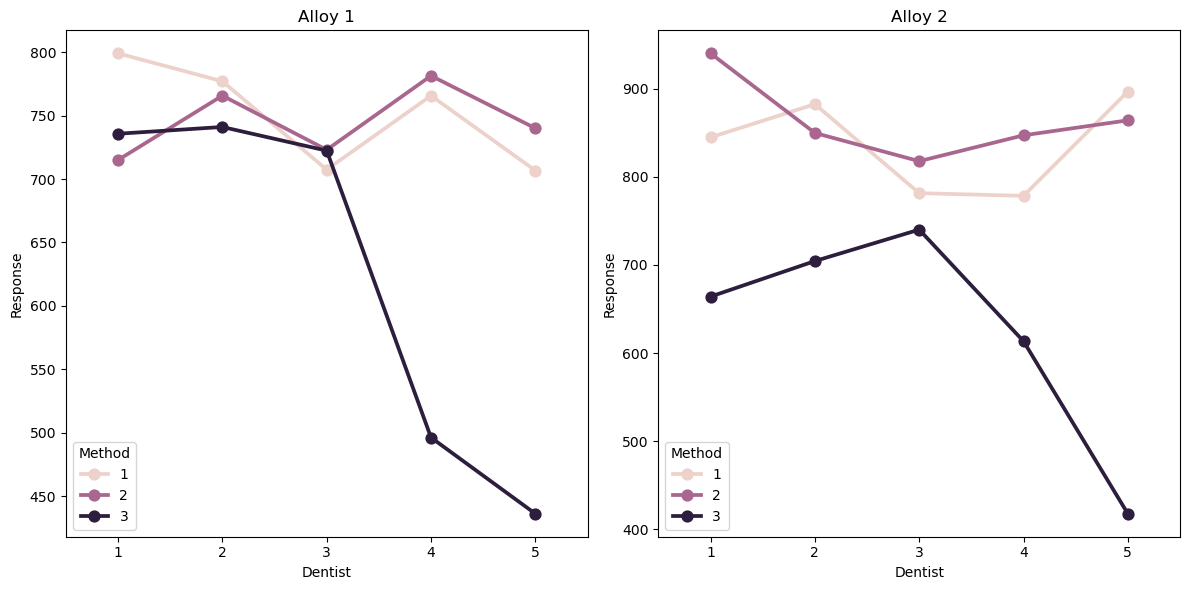

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.pointplot(data=df1_alloy_1,x="Dentist",y="Response",hue="Method",errorbar=("ci",False),ax=axes[0])
axes[0].set_title("Alloy 1")

sns.pointplot(data=df1_alloy_2,x="Dentist",y="Response",hue="Method",errorbar=("ci",False),ax=axes[1])
axes[1].set_title("Alloy 2")

plt.tight_layout()
plt.show()

### It can be observed from the plot that there is a certain interaction between the two treatments namely the number of favourable dentists and the type of method used. The following inferences can be made from the interaction plot:

1. The mean hardness of the implants for both the alloys for method 1 and 2 ranges from 700-950
2. The mean hardness of the implants for both the alloys for method 3 ranges from 400-750
3. The mean hardness of the implants for both the alloys decreases greatly for method 3 with the increasing number of favourable dentists
4. The mean hardness of the implants for both the alloys becomes relatively lower for method 3 when compared to methods 1 and 2 as the number of favourable dentists increases

### Finding how does the hardness of implants vary depending on dentists and methods together.

### The hypotheses for the Two Way ANOVA are:

For Alloy 1:

$H_0$ -> The mean hardness of implants for alloy 1 is the same across the treatments methods and dentists.

$H_a$ -> For at least one level of treatments methods and dentists for alloy 1, the mean hardness of implants is different.

For Alloy 2:

$H_0$ -> The mean hardness of implants for alloy 2 is the same across the treatments methods and dentists.

$H_a$ -> For at least one level of treatments methods and dentists for alloy 2, the mean hardness of implants is different.

Since two treatments are involved in this problem statement, we will be conducting a two way ANOVA test.

### Checking the assumptions of the Two Way ANOVA test using the Shapiro's and Levene's test

#### Shapiro's Test

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^S_o$ -> The group populations from which the dental implant sample is provided follow normal distributions for both the alloys for the treatments methods and dentists.

$H^S_a$ -> The group populations from which the dental implant sample is provided do not follow normal distributions for both the alloys for the treatments methods and dentists.

In [32]:
#Categorising the response variable as per the different alloys and levels of methods and dentists

#For Alloy 1

    #For Method 1
a1_method_1_dentist_1 = df1[(df1.Dentist == 1) & (df1.Method == 1) & (df1.Alloy == 1)]["Response"]
a1_method_1_dentist_2 = df1[(df1.Dentist == 2) & (df1.Method == 1) & (df1.Alloy == 1)]["Response"]
a1_method_1_dentist_3 = df1[(df1.Dentist == 3) & (df1.Method == 1) & (df1.Alloy == 1)]["Response"]
a1_method_1_dentist_4 = df1[(df1.Dentist == 4) & (df1.Method == 1) & (df1.Alloy == 1)]["Response"]
a1_method_1_dentist_5 = df1[(df1.Dentist == 5) & (df1.Method == 1) & (df1.Alloy == 1)]["Response"]

    #For Method 2
a1_method_2_dentist_1 = df1[(df1.Dentist == 1) & (df1.Method == 2) & (df1.Alloy == 1)]["Response"]
a1_method_2_dentist_2 = df1[(df1.Dentist == 2) & (df1.Method == 2) & (df1.Alloy == 1)]["Response"]
a1_method_2_dentist_3 = df1[(df1.Dentist == 3) & (df1.Method == 2) & (df1.Alloy == 1)]["Response"]
a1_method_2_dentist_4 = df1[(df1.Dentist == 4) & (df1.Method == 2) & (df1.Alloy == 1)]["Response"]
a1_method_2_dentist_5 = df1[(df1.Dentist == 5) & (df1.Method == 2) & (df1.Alloy == 1)]["Response"]
    
    #For Method 3
a1_method_3_dentist_1 = df1[(df1.Dentist == 1) & (df1.Method == 3) & (df1.Alloy == 1)]["Response"]
a1_method_3_dentist_2 = df1[(df1.Dentist == 2) & (df1.Method == 3) & (df1.Alloy == 1)]["Response"]
a1_method_3_dentist_3 = df1[(df1.Dentist == 3) & (df1.Method == 3) & (df1.Alloy == 1)]["Response"]
a1_method_3_dentist_4 = df1[(df1.Dentist == 4) & (df1.Method == 3) & (df1.Alloy == 1)]["Response"]
a1_method_3_dentist_5 = df1[(df1.Dentist == 5) & (df1.Method == 3) & (df1.Alloy == 1)]["Response"]

print("For alloy 1:\n\nMethod 1:\n",
      "Dentist 1:",stats.shapiro(a1_method_1_dentist_1),"\n",
      "Dentist 2:",stats.shapiro(a1_method_1_dentist_2),"\n",
      "Dentist 3:",stats.shapiro(a1_method_1_dentist_3),"\n",
      "Dentist 4:",stats.shapiro(a1_method_1_dentist_4),"\n",
      "Dentist 5:",stats.shapiro(a1_method_1_dentist_5),"\n",
      "\nMethod 2:\n",
      "Dentist 1:",stats.shapiro(a1_method_2_dentist_1),"\n",
      "Dentist 2:",stats.shapiro(a1_method_2_dentist_2),"\n",
      "Dentist 3:",stats.shapiro(a1_method_2_dentist_3),"\n",
      "Dentist 4:",stats.shapiro(a1_method_2_dentist_4),"\n",
      "Dentist 5:",stats.shapiro(a1_method_2_dentist_5),"\n",
      "\nMethod 2:\n",
      "Dentist 1:",stats.shapiro(a1_method_3_dentist_1),"\n",
      "Dentist 2:",stats.shapiro(a1_method_3_dentist_2),"\n",
      "Dentist 3:",stats.shapiro(a1_method_3_dentist_3),"\n",
      "Dentist 4:",stats.shapiro(a1_method_3_dentist_4),"\n",
      "Dentist 5:",stats.shapiro(a1_method_3_dentist_5),"\n"
     )

For alloy 1:

Method 1:
 Dentist 1: ShapiroResult(statistic=0.7500000596046448, pvalue=-9.106917104872991e-07) 
 Dentist 2: ShapiroResult(statistic=0.8256532549858093, pvalue=0.17733535170555115) 
 Dentist 3: ShapiroResult(statistic=0.8036999702453613, pvalue=0.12336116284132004) 
 Dentist 4: ShapiroResult(statistic=0.9834790229797363, pvalue=0.7538362145423889) 
 Dentist 5: ShapiroResult(statistic=0.998848021030426, pvalue=0.9351651668548584) 
 
Method 2:
 Dentist 1: ShapiroResult(statistic=0.9404369592666626, pvalue=0.5291318893432617) 
 Dentist 2: ShapiroResult(statistic=0.926685631275177, pvalue=0.47633662819862366) 
 Dentist 3: ShapiroResult(statistic=0.9708737730979919, pvalue=0.6724511384963989) 
 Dentist 4: ShapiroResult(statistic=0.9929609298706055, pvalue=0.8395751118659973) 
 Dentist 5: ShapiroResult(statistic=0.9778187274932861, pvalue=0.7144943475723267) 
 
Method 2:
 Dentist 1: ShapiroResult(statistic=0.9829810261726379, pvalue=0.75013267993927) 
 Dentist 2: ShapiroResult

#### It can be observed that the p-values for almost all the levels of the treatments methods and dentists for alloy 1 are greater than the level of significance ($\alpha$) of 0.05. Hence there is enough evidence to conclude that for alloy 1, we cannot reject the null hypothesis for the treatments methods and dentists.

In [33]:
#For Alloy 2

    #For Method 1
a2_method_1_dentist_1 = df1[(df1.Dentist == 1) & (df1.Method == 1) & (df1.Alloy == 2)]["Response"]
a2_method_1_dentist_2 = df1[(df1.Dentist == 2) & (df1.Method == 1) & (df1.Alloy == 2)]["Response"]
a2_method_1_dentist_3 = df1[(df1.Dentist == 3) & (df1.Method == 1) & (df1.Alloy == 2)]["Response"]
a2_method_1_dentist_4 = df1[(df1.Dentist == 4) & (df1.Method == 1) & (df1.Alloy == 2)]["Response"]
a2_method_1_dentist_5 = df1[(df1.Dentist == 5) & (df1.Method == 1) & (df1.Alloy == 2)]["Response"]
    
    #For Method 2
a2_method_2_dentist_1 = df1[(df1.Dentist == 1) & (df1.Method == 2) & (df1.Alloy == 2)]["Response"]
a2_method_2_dentist_2 = df1[(df1.Dentist == 2) & (df1.Method == 2) & (df1.Alloy == 2)]["Response"]
a2_method_2_dentist_3 = df1[(df1.Dentist == 3) & (df1.Method == 2) & (df1.Alloy == 2)]["Response"]
a2_method_2_dentist_4 = df1[(df1.Dentist == 4) & (df1.Method == 2) & (df1.Alloy == 2)]["Response"]
a2_method_2_dentist_5 = df1[(df1.Dentist == 5) & (df1.Method == 2) & (df1.Alloy == 2)]["Response"]
    
    #For Method 3
a2_method_3_dentist_1 = df1[(df1.Dentist == 1) & (df1.Method == 3) & (df1.Alloy == 2)]["Response"]
a2_method_3_dentist_2 = df1[(df1.Dentist == 2) & (df1.Method == 3) & (df1.Alloy == 2)]["Response"]
a2_method_3_dentist_3 = df1[(df1.Dentist == 3) & (df1.Method == 3) & (df1.Alloy == 2)]["Response"]
a2_method_3_dentist_4 = df1[(df1.Dentist == 4) & (df1.Method == 3) & (df1.Alloy == 2)]["Response"]
a2_method_3_dentist_5 = df1[(df1.Dentist == 5) & (df1.Method == 3) & (df1.Alloy == 2)]["Response"]

print("For alloy 2:\n\nMethod 1:\n",
      "Dentist 1:",stats.shapiro(a2_method_1_dentist_1),"\n",
      "Dentist 2:",stats.shapiro(a2_method_1_dentist_2),"\n",
      "Dentist 3:",stats.shapiro(a2_method_1_dentist_3),"\n",
      "Dentist 4:",stats.shapiro(a2_method_1_dentist_4),"\n",
      "Dentist 5:",stats.shapiro(a2_method_1_dentist_5),"\n",
      "\nMethod 2:\n",
      "Dentist 1:",stats.shapiro(a2_method_2_dentist_1),"\n",
      "Dentist 2:",stats.shapiro(a2_method_2_dentist_2),"\n",
      "Dentist 3:",stats.shapiro(a2_method_2_dentist_3),"\n",
      "Dentist 4:",stats.shapiro(a2_method_2_dentist_4),"\n",
      "Dentist 5:",stats.shapiro(a2_method_2_dentist_5),"\n",
      "\nMethod 2:\n",
      "Dentist 1:",stats.shapiro(a2_method_3_dentist_1),"\n",
      "Dentist 2:",stats.shapiro(a2_method_3_dentist_2),"\n",
      "Dentist 3:",stats.shapiro(a2_method_3_dentist_3),"\n",
      "Dentist 4:",stats.shapiro(a2_method_3_dentist_4),"\n",
      "Dentist 5:",stats.shapiro(a2_method_3_dentist_5),"\n"
     )

For alloy 2:

Method 1:
 Dentist 1: ShapiroResult(statistic=0.9792426824569702, pvalue=0.723876953125) 
 Dentist 2: ShapiroResult(statistic=0.9998611211776733, pvalue=0.9774916172027588) 
 Dentist 3: ShapiroResult(statistic=0.9412217140197754, pvalue=0.532307505607605) 
 Dentist 4: ShapiroResult(statistic=0.9907512664794922, pvalue=0.8160430788993835) 
 Dentist 5: ShapiroResult(statistic=0.9727578163146973, pvalue=0.6833236217498779) 
 
Method 2:
 Dentist 1: ShapiroResult(statistic=0.8421052694320679, pvalue=0.219557985663414) 
 Dentist 2: ShapiroResult(statistic=0.9095803499221802, pvalue=0.4166799485683441) 
 Dentist 3: ShapiroResult(statistic=0.9723075032234192, pvalue=0.6806928515434265) 
 Dentist 4: ShapiroResult(statistic=0.8995017409324646, pvalue=0.383916437625885) 
 Dentist 5: ShapiroResult(statistic=0.8248403668403625, pvalue=0.1752912998199463) 
 
Method 2:
 Dentist 1: ShapiroResult(statistic=0.8147925734519958, pvalue=0.15032446384429932) 
 Dentist 2: ShapiroResult(statisti

#### It can be observed that the p-values for all the levels of the treatments methods and dentists for alloy 2 are greater than the level of significance ($\alpha$) of 0.05. Hence there is enough evidence to conclude that for alloy 2, we cannot reject the null hypothesis for the treatments methods and dentists.

### Hence the group populations across both the alloys for the treatments methods and dentists FOLLOW NORMAL DISTRIBUTIONS.

#### Levene's Test

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^L_o$ -> The group populations from which the dental implant sample is provided have equal variances for both the alloys for the different levels of methods and dentists.

$H^L_a$ -> At least one of the group populations from which the dental implant sample is provided do not have equal variances for both the alloys for the different levels of methods and dentists.

In [34]:
print("For alloy 1:\n",stats.levene(a1_method_1_dentist_1,a1_method_1_dentist_2,a1_method_1_dentist_3,a1_method_1_dentist_4,a1_method_1_dentist_5,
       a1_method_2_dentist_1,a1_method_2_dentist_2,a1_method_2_dentist_3,a1_method_2_dentist_4,a1_method_2_dentist_5,
       a1_method_3_dentist_1,a1_method_3_dentist_2,a1_method_3_dentist_3,a1_method_3_dentist_4,a1_method_3_dentist_5,),"\n")

print("For alloy 2:\n",stats.levene(a2_method_1_dentist_1,a2_method_1_dentist_2,a2_method_1_dentist_3,a2_method_1_dentist_4,a2_method_1_dentist_5,
       a2_method_2_dentist_1,a2_method_2_dentist_2,a2_method_2_dentist_3,a2_method_2_dentist_4,a2_method_2_dentist_5,
       a2_method_3_dentist_1,a2_method_3_dentist_2,a2_method_3_dentist_3,a2_method_3_dentist_4,a2_method_3_dentist_5,),"\n")

For alloy 1:
 LeveneResult(statistic=1.21885320778582, pvalue=0.3128166652989495) 

For alloy 2:
 LeveneResult(statistic=0.6709660298340363, pvalue=0.7831735515657826) 



#### It can be observed that the p-values for the treatments methods and dentists for both the types of alloys is more than the level of significance ($\alpha$) of 0.05. Hence there is enough evidence to conclude that for both the alloys, we cannot reject the null hypothesis for the treatments methods and dentists.

### Hence the group populations for both the alloys for the treatments methods and dentists HAVE EQUAL VARIANCES.

## Conducting the hypothesis test and computing the p-value

In [35]:
formula_dentist_method = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'

#For alloy 1:
dentist_method_model_alloy_1 = ols(formula_dentist_method,df1_alloy_1).fit()
dentist_method_aov_alloy_1 = anova_lm(dentist_method_model_alloy_1)


#For alloy 2:
dentist_method_model_alloy_2 = ols(formula_dentist_method,df1_alloy_2).fit()
dentist_method_aov_alloy_2 = anova_lm(dentist_method_model_alloy_2)

print("For Alloy 1:\n",dentist_method_aov_alloy_1,"\n\nFor Alloy 2:\n",dentist_method_aov_alloy_2)

For Alloy 1:
                         df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN 

For Alloy 2:
                         df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


### It can be observed for both the alloys that the p-values for the treatments methods and dentists have slightly changed from before when they were analysed individually using one way ANOVA. This change can be contributed to the effect of their interaction with each other.

### For Alloy 1, it can be observed that the p-values are less than the alpha value of 0.05 hence we reject the null hypothesis. This means that the mean hardness of the implants of the group populations of at least one of the implants for alloy 1 is different and hence it is dependent upon the treatments methods and dentists.

### For Alloy 2, it can be observed that the p-values are greater than the alpha value of 0.05 hence we fail to reject the null hypothesis. The p-value of only the methods treatment is less than the alpha value of 0.05 hence we reject the null hypothesis. This means that the mean hardness of the implants of the group populations of the treatments dentists and the combined interaction of dentists and methods is the same hence it is independent of these treatments. Additionally, it means that the mean hardness of the implants of the group populations of the treatment methods is different hence it is dependent upon the methods.

### Conducting the Tuskey's HSD test to identify the pairs with different hardness implants

#### Tuskey's HSD Test

The Tukey's HSD test is conducted to find out which pair of groups have significantly different means.

The following null and alternative hypotheses can be stated for this test for our problem statement:

$H^T_o$ ->The mean hardness of all the group populations is the same for both the alloys across the levels of treatment of methods.

$H^T_a$ -> The mean hardness of some of the group populations is different for both the alloys across the different levels of treatment of methods.

In [36]:
# Combine the data and create group labels

#For Alloy1
data_a1 = pd.concat([a1_method_1_dentist_1,a1_method_1_dentist_2,a1_method_1_dentist_3,a1_method_1_dentist_4,a1_method_1_dentist_5,
                     a1_method_2_dentist_1,a1_method_2_dentist_2,a1_method_2_dentist_3,a1_method_2_dentist_4,a1_method_2_dentist_5,
                     a1_method_3_dentist_1,a1_method_3_dentist_2,a1_method_3_dentist_3,a1_method_3_dentist_4,a1_method_3_dentist_5])

#For Alloy2
data_a2 = pd.concat([a2_method_1_dentist_1,a2_method_1_dentist_2,a2_method_1_dentist_3,a2_method_1_dentist_4,a2_method_1_dentist_5,
                    a2_method_2_dentist_1,a2_method_2_dentist_2,a2_method_2_dentist_3,a2_method_2_dentist_4,a2_method_2_dentist_5,
                    a2_method_3_dentist_1,a2_method_3_dentist_2,a2_method_3_dentist_3,a2_method_3_dentist_4,a2_method_3_dentist_5])

groups_a1 = (
['Method 1 Dentist 1'] * len(a1_method_1_dentist_1) + 
['Method 1 Dentist 2'] * len(a1_method_1_dentist_2) + 
['Method 1 Dentist 3'] * len(a1_method_1_dentist_3) +
['Method 1 Dentist 4'] * len(a1_method_1_dentist_4) +
['Method 1 Dentist 5'] * len(a1_method_1_dentist_5) +

['Method 2 Dentist 1'] * len(a1_method_2_dentist_1) +
['Method 2 Dentist 2'] * len(a1_method_2_dentist_2) +
['Method 2 Dentist 3'] * len(a1_method_2_dentist_3) +
['Method 2 Dentist 4'] * len(a1_method_2_dentist_4) +
['Method 2 Dentist 5'] * len(a1_method_2_dentist_5) +

['Method 3 Dentist 1'] * len(a1_method_3_dentist_1) +
['Method 3 Dentist 2'] * len(a1_method_3_dentist_2) +
['Method 3 Dentist 3'] * len(a1_method_3_dentist_3) +
['Method 3 Dentist 4'] * len(a1_method_3_dentist_4) +
['Method 3 Dentist 5'] * len(a1_method_3_dentist_5))

groups_a2 = (
['Method 1 Dentist 1'] * len(a2_method_1_dentist_1) +
['Method 1 Dentist 2'] * len(a2_method_1_dentist_2) +
['Method 1 Dentist 3'] * len(a2_method_1_dentist_3) +
['Method 1 Dentist 4'] * len(a2_method_1_dentist_4) +
['Method 1 Dentist 5'] * len(a2_method_1_dentist_5) +

['Method 2 Dentist 1'] * len(a2_method_2_dentist_1) +
['Method 2 Dentist 2'] * len(a2_method_2_dentist_2) +
['Method 2 Dentist 3'] * len(a2_method_2_dentist_3) +
['Method 2 Dentist 4'] * len(a2_method_2_dentist_4) +
['Method 2 Dentist 5'] * len(a2_method_2_dentist_5) +

['Method 3 Dentist 1'] * len(a2_method_3_dentist_1) +
['Method 3 Dentist 2'] * len(a2_method_3_dentist_2) +
['Method 3 Dentist 3'] * len(a2_method_3_dentist_3) +
['Method 3 Dentist 4'] * len(a2_method_3_dentist_4) +
['Method 3 Dentist 5'] * len(a2_method_3_dentist_5))


# Perform Tukey's HSD test

#For Alloy 1
tukey_result_a1 = pairwise_tukeyhsd(endog=data_a1, groups=groups_a1, alpha=0.05)

#For Alloy 2
tukey_result_a2 = pairwise_tukeyhsd(endog=data_a2, groups=groups_a2, alpha=0.05)

print(tukey_result_a1)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------------
Method 1 Dentist 1 Method 1 Dentist 2     -22.0    1.0 -270.8283  226.8283  False
Method 1 Dentist 1 Method 1 Dentist 3  -91.6667 0.9853  -340.495  157.1617  False
Method 1 Dentist 1 Method 1 Dentist 4  -33.3333    1.0 -282.1617   215.495  False
Method 1 Dentist 1 Method 1 Dentist 5  -92.3333 0.9844 -341.1617   156.495  False
Method 1 Dentist 1 Method 2 Dentist 1     -84.0 0.9933 -332.8283  164.8283  False
Method 1 Dentist 1 Method 2 Dentist 2  -33.3333    1.0 -282.1617   215.495  False
Method 1 Dentist 1 Method 2 Dentist 3     -76.0 0.9975 -324.8283  172.8283  False
Method 1 Dentist 1 Method 2 Dentist 4  -17.6667    1.0  -266.495  231.1617  False
Method 1 Dentist 1 Method 2 Dentist 5     -59.0 0.9998 -307.8283  189.8283  False
Method 1 Dentist

In [37]:
print(tukey_result_a2)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------------
Method 1 Dentist 1 Method 1 Dentist 2   37.6667    1.0 -303.2292  378.5625  False
Method 1 Dentist 1 Method 1 Dentist 3  -63.3333    1.0 -404.2292  277.5625  False
Method 1 Dentist 1 Method 1 Dentist 4  -66.3333    1.0 -407.2292  274.5625  False
Method 1 Dentist 1 Method 1 Dentist 5      52.0    1.0 -288.8958  392.8958  False
Method 1 Dentist 1 Method 2 Dentist 1   95.3333  0.999 -245.5625  436.2292  False
Method 1 Dentist 1 Method 2 Dentist 2       5.0    1.0 -335.8958  345.8958  False
Method 1 Dentist 1 Method 2 Dentist 3     -27.0    1.0 -367.8958  313.8958  False
Method 1 Dentist 1 Method 2 Dentist 4    2.3333    1.0 -338.5625  343.2292  False
Method 1 Dentist 1 Method 2 Dentist 5   19.3333    1.0 -321.5625  360.2292  False
Method 1 Dentist